#### Library imports

In [ ]:
%pip install waymo-open-dataset-tf-2-6-0

In [1]:
import os
from os import path

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import tensorflow as tf

import waymo_open_dataset
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

#### Utils

In [10]:
CAMERA_INDEXES = {
  'FRONT': 0
}

def frame_reader(target_dir, cam_label = 'FRONT'):
    files = os.listdir(target_dir)
    for file in files:
        if path.isdir(file):
            continue
        for frame in _file_frame_reader(target_dir + '/' + file, cam_label):
            yield frame


def _file_frame_reader(file, cam_label):
    dataset = tf.data.TFRecordDataset(file, compression_type='')
    for data in dataset:
        frame = open_dataset.Frame()
        frame.ParseFromString(bytearray(data.numpy()))
        image = frame.images[CAMERA_INDEXES[cam_label]]
        labels = [camera_labels for camera_labels in frame.camera_labels if camera_labels.name == CAMERA_INDEXES[cam_label] + 1]
        yield (image, labels)

def show_camera_image(camera_image, camera_labels, layout, cmap=None):
  """Show a camera image and the given camera labels."""

  plt.figure(figsize=(25, 20))
  ax = plt.subplot(*layout)

  for camera_label in camera_labels:
    # Draw the camera labels.
    # Iterate over the individual labels.
    for label in camera_label.labels:
      # Draw the object bounding box.
      ax.add_patch(patches.Rectangle(
        xy=(label.box.center_x - 0.5 * label.box.length,
            label.box.center_y - 0.5 * label.box.width),
        width=label.box.length,
        height=label.box.width,
        linewidth=1,
        edgecolor='red',
        facecolor='none'))

  # Show the camera image.
  plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
  plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
  plt.grid(False)
  plt.axis('off')

#### Test read

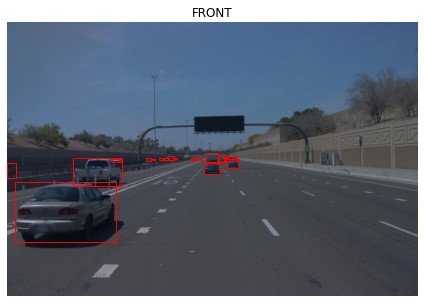

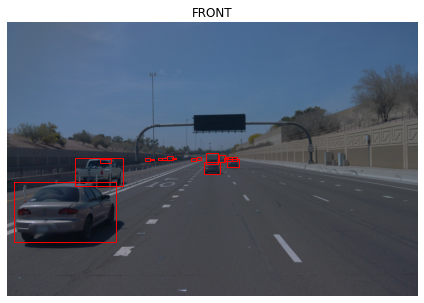

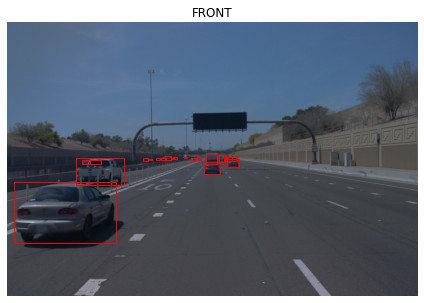

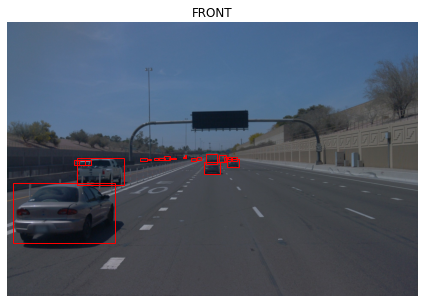

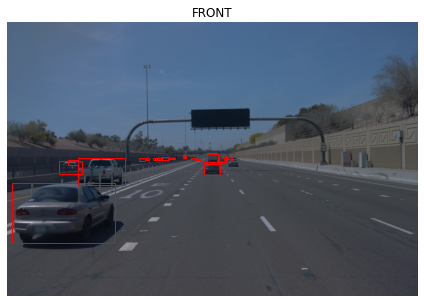

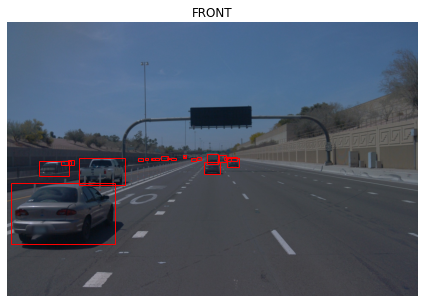

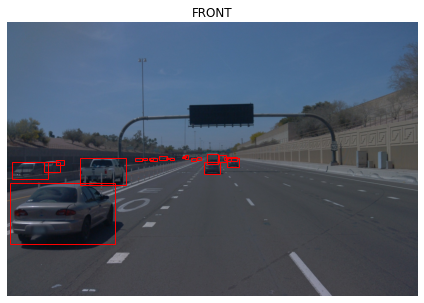

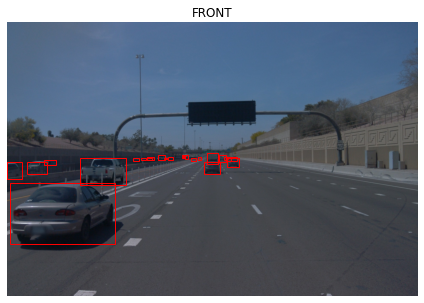

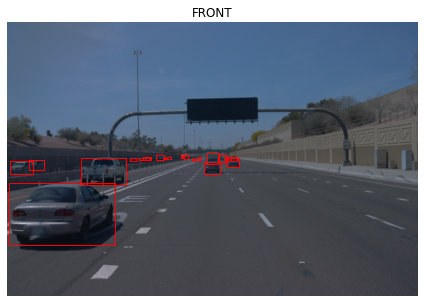

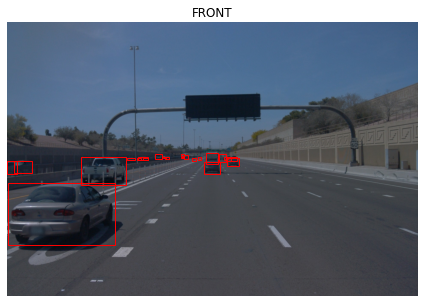

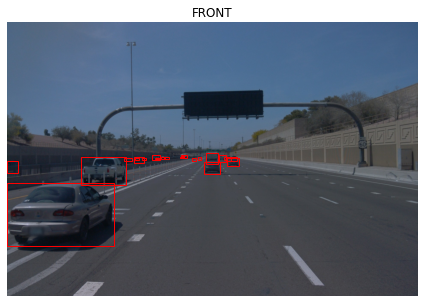

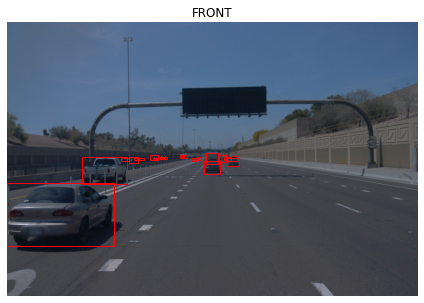

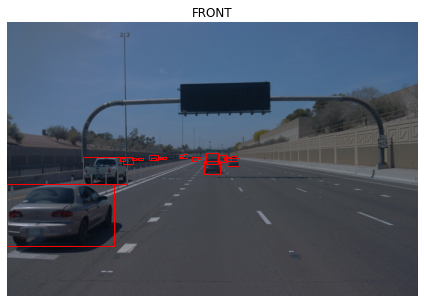

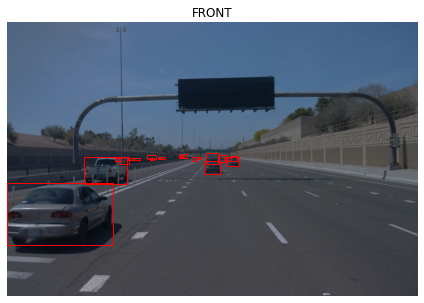

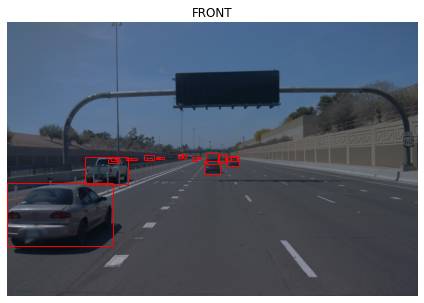

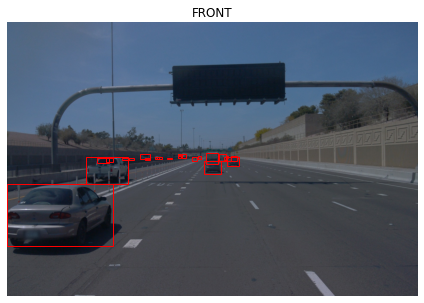

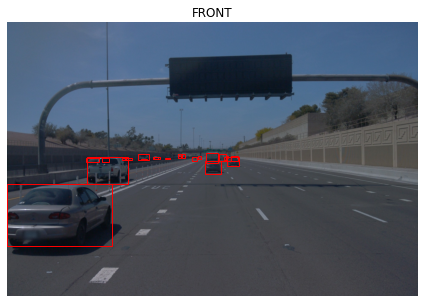

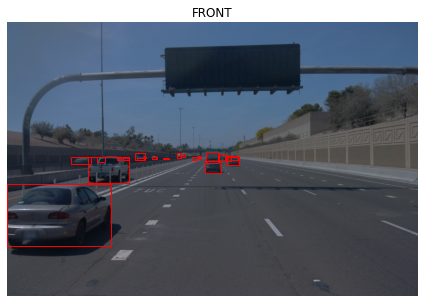

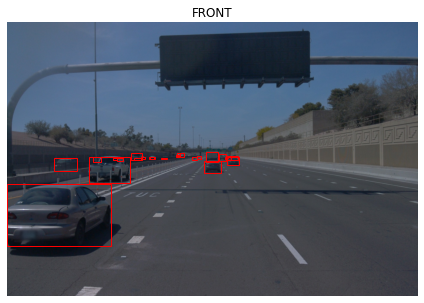

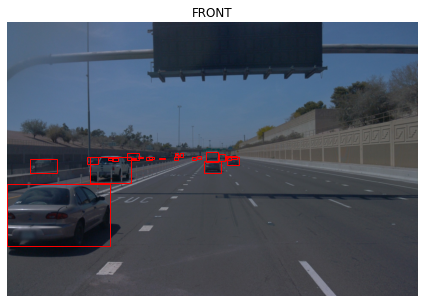

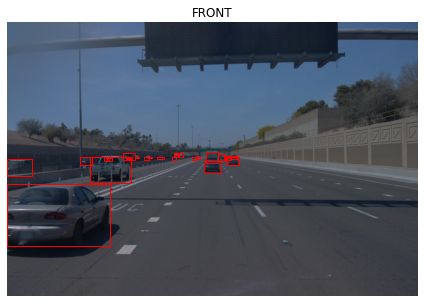

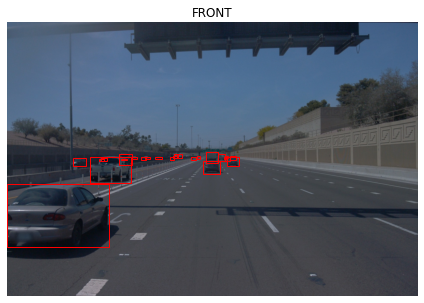

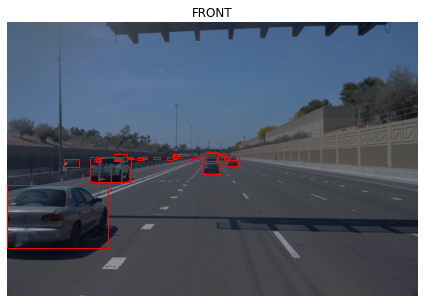

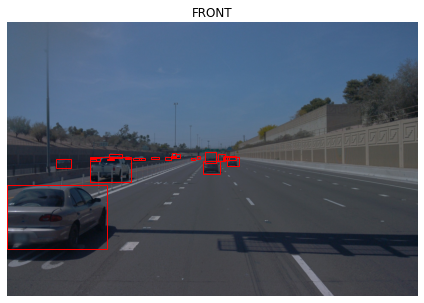

In [11]:
reader = frame_reader('Data/training')
for (image, labels) in reader:
  show_camera_image(image, labels, [3, 3, 1])
  plt.show()
  
  key = input()
  if key == 'z':
    break